Overview:
All the required libraries have been imported, the data has been preprocessed and visualized, and then trained with several classfication algorithms and results have been displayed. We have used SVM and random forest classifier to predict job roles on a set of resumes 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import tree, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import model_selection
from IPython.display import Image
import os
import nltk
nltk.download('punkt')
import PyPDF2
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


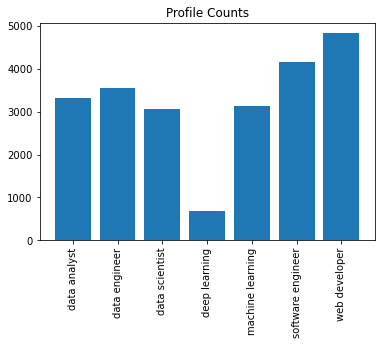

In [2]:
#reading the csv data file and displaying the number of records in each of the job profiles
dataframe=pd.read_csv("dataset-final.csv")

aggregated_profiles = dataframe.groupby('Profile').count()
# plt.figure(figsize=(20,5))
plt.bar(aggregated_profiles.index, aggregated_profiles["Skills"])
plt.xticks(rotation='vertical')
plt.title("Profile Counts")
plt.show()

In [3]:
# displaying the dataframe 
dataframe

,Profile,Skills,Experience,CompanyName,CompanyRanking
0,data engineer,"javascript,python,react",9,Universal Health Services,281
1,data engineer,"python,sql,hadoop,hbase,hive",11,Allstate,72
2,data engineer,"python,sql,aws,pandas",10,Parker-Hannifin,224
3,data engineer,"hadoop,hive,pig",12,Levi Strauss,495
4,data engineer,"css,html,javascript,python,r,sql,django",7,Oneok,313
...,...,...,...,...,...
22761,deep learning,"python,hadoop,hive,pig,spark",4,Uber Technologies,228
22762,deep learning,"python,hadoop,hive,pig,spark",14,Alphabet,11
22763,deep learning,"python,hadoop,hive,pig,spark",7,Johnson & Johnson,35
22764,deep learning,"python,hadoop,hive,pig,spark",13,Post Holdings,499


In [4]:
# collecting a unique set of skills and companies from dataframe
unique_skills_set = set ()
unique_skills_index = {}

unique_companies_set = set ()
unique_company_index = {}

for index in dataframe.index:
    unique_skills_set = unique_skills_set.union(dataframe.loc[index, "Skills"].split(","))
    unique_companies_set = unique_companies_set.union([dataframe.loc[index, "CompanyName"]])
unique_skills_set = list(unique_skills_set)
unique_companies_set = list(unique_companies_set)

for i in range(len(unique_skills_set)):
    unique_skills_index[unique_skills_set[i]] = i
for j in range(len(unique_companies_set)):
    unique_company_index[unique_companies_set[j]] = i + j

In [5]:
#based on unique skills, dividing dataframe into X and y, for every record, columns of unique skills updated, each skill will 
# have 1 if skill is present for that row otherwise 0

X = np.zeros((len(dataframe), len(unique_skills_set) 
              # + len(unique_companies_set) + 2
             ))
y = np.array([i for i in dataframe["Profile"]])

experience_i = len(unique_skills_set) + len(unique_companies_set)
company_ranking_i = len(unique_skills_set) + len(unique_companies_set) + 1
for index in dataframe.index:
    for skill in dataframe.loc[index, "Skills"].split(","):
        X[index, unique_skills_index[skill]] += 1
#     X[index, unique_company_index[dataframe.loc[index, "CompanyName"]]] += 1
#     X[index, experience_i] = dataframe.loc[index, "Experience"]
#     X[index, company_ranking_i] = dataframe.loc[index, "CompanyRanking"]

# X[:, experience_i] = (X[:, experience_i] - X[:, experience_i].min()) / (X[:, company_ranking_i].max() - X[:, company_ranking_i].min())
# X[:, company_ranking_i] = (X[:, company_ranking_i] - X[:, company_ranking_i].min()) / (X[:, company_ranking_i].max() - X[:, company_ranking_i].min())

print("X ", X.shape)
print("y ", y.shape)

X  (22766, 44)
y  (22766,)


In [6]:
# displaying the dataframe
pd.DataFrame(columns=unique_skills_set, data=X)

,hbase,pandas,rails,scala,mvc,php,laravel,matlab,tensorflow,postgresql,...,mysql,jquery,java,lua,mongodb,asp.net,perl,python,css,haskell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
# printing all skills
print("no of skills : ",len(unique_skills_set))
print(unique_skills_set)

no of skills :  44
['hbase', 'pandas', 'rails', 'scala', 'mvc', 'php', 'laravel', 'matlab', 'tensorflow', 'postgresql', 'hive', 'angular', 'html', 'spark', 'aws', 'numpy', 'sql', 'cassandra', 'node', 'javascript', 'r', 'pig', 'linux', 'c#', 'react', 'django', 'sas', 'ruby', 'julia', 'c++', 'nltk', 'hadoop', 'ajax', 'octave', 'mysql', 'jquery', 'java', 'lua', 'mongodb', 'asp.net', 'perl', 'python', 'css', 'haskell']


In [8]:
# printing all companies
print("no of companies : ",len(unique_companies_set))
print(unique_companies_set)

no of companies :  500
['Coca-Cola', 'Cognizant Technology Solutions', 'Sonic Automotive', 'BorgWarner', 'Entergy', 'Capital One Financial', 'HollyFrontier', 'Office Depot', 'Northrop Grumman', 'KKR', 'TIAA', 'Jones Financial (Edward Jones)', 'Tapestry', 'American Express', 'Stanley Black & Decker', 'Expeditors Intl. of Washington', 'Performance Food Group', 'Dollar Tree', 'Magellan Health', 'AT&T', 'PPL', 'Xerox Holdings', 'Tenneco', 'PNC Financial Services Group', 'Boston Scientific', 'Alleghany', 'Univar Solutions', "Lowe's", 'AutoNation', 'Sherwin-Williams', "Dick's Sporting Goods", 'Crown Holdings', 'Edison International', 'JetBlue Airways', 'US Foods Holding', 'Robert Half International', 'Mosaic', 'Brighthouse Financial', 'Bank of America', 'Cerner', 'StoneX Group', 'AbbVie', 'Intercontinental Exchange', 'VF', 'D.R. Horton', 'Amazon.com', 'SpartanNash', 'International Paper', 'Assurant', 'Target', 'Morgan Stanley', 'Lear', 'Leidos Holdings', 'General Electric', 'Laboratory Corp.

In [9]:
# keeping a copy for visializing the data and convertting skills column as list for each row
visualize_data_set=dataframe.copy()
visualize_data_set.drop(['Experience', 'CompanyName','CompanyRanking'], axis=1, inplace=True)
visualize_data_set['Skills']=visualize_data_set['Skills'].str.split(",")

In [10]:
# printing the dataset
visualize_data_set

,Profile,Skills
0,data engineer,"[javascript, python, react]"
1,data engineer,"[python, sql, hadoop, hbase, hive]"
2,data engineer,"[python, sql, aws, pandas]"
3,data engineer,"[hadoop, hive, pig]"
4,data engineer,"[css, html, javascript, python, r, sql, django]"
...,...,...
22761,deep learning,"[python, hadoop, hive, pig, spark]"
22762,deep learning,"[python, hadoop, hive, pig, spark]"
22763,deep learning,"[python, hadoop, hive, pig, spark]"
22764,deep learning,"[python, hadoop, hive, pig, spark]"


In [11]:
count_of_skills={uniqueSkill: [0]*len(visualize_data_set['Skills'])for uniqueSkill in unique_skills_set}
print(count_of_skills.keys())
print(len(count_of_skills.keys()))

dict_keys(['hbase', 'pandas', 'rails', 'scala', 'mvc', 'php', 'laravel', 'matlab', 'tensorflow', 'postgresql', 'hive', 'angular', 'html', 'spark', 'aws', 'numpy', 'sql', 'cassandra', 'node', 'javascript', 'r', 'pig', 'linux', 'c#', 'react', 'django', 'sas', 'ruby', 'julia', 'c++', 'nltk', 'hadoop', 'ajax', 'octave', 'mysql', 'jquery', 'java', 'lua', 'mongodb', 'asp.net', 'perl', 'python', 'css', 'haskell'])
44


In [12]:
#Parse through each message, with each word, update the count of unique words in the dictionary 
for index,row in enumerate(visualize_data_set['Skills']):
    for word in row:
        count_of_skills[word][index]+=1

In [13]:
#Converting the dictionary to data frame        
count_of_skills_dataframe=pd.DataFrame(count_of_skills)
count_of_skills_dataframe.head()

visualize_data_set=pd.concat([visualize_data_set, count_of_skills_dataframe],axis=1).drop(columns='Skills')
visualize_data_set.head()

,Profile,hbase,pandas,rails,scala,mvc,php,laravel,matlab,tensorflow,...,mysql,jquery,java,lua,mongodb,asp.net,perl,python,css,haskell
0,data engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,data engineer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,data engineer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,data engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,data engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


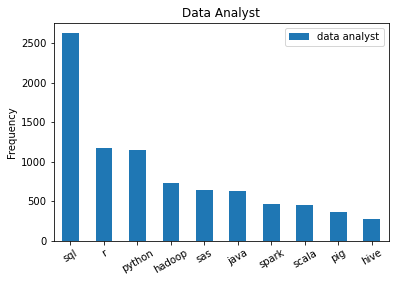

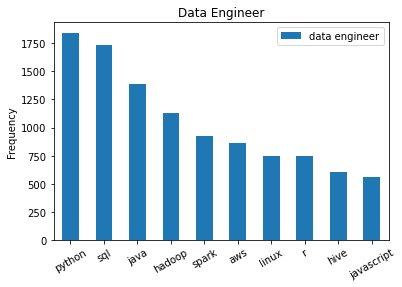

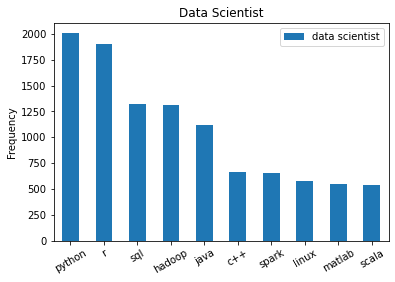

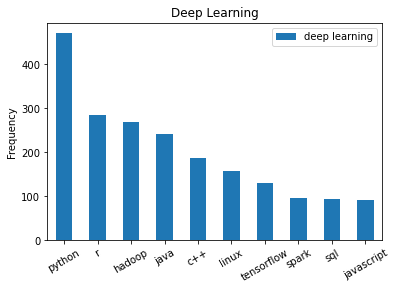

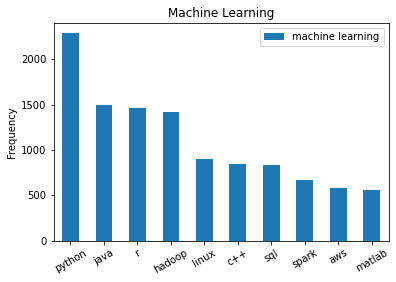

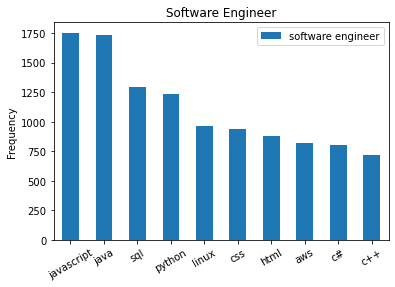

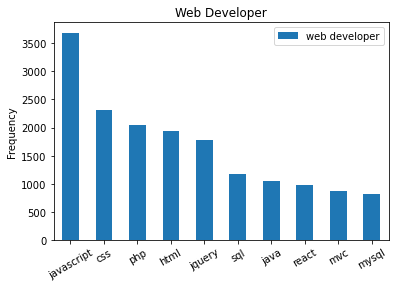

In [14]:
# Displaying the top 10 skills for each role  
groups = visualize_data_set.groupby('Profile').sum()
for index, row in groups.iterrows():
    demandskills=row.nlargest(n=10, keep='first')
    data=pd.DataFrame(demandskills).T
    data=data.T
    data.plot(kind="bar")
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)
    plt.title(index.title())
    plt.show()

In [15]:
# displaying the count of each role
visualize_data_set.groupby('Profile').count()

,hbase,pandas,rails,scala,mvc,php,laravel,matlab,tensorflow,postgresql,...,mysql,jquery,java,lua,mongodb,asp.net,perl,python,css,haskell
Profile,,,,,,,,,,,,,,,,,,,,,
data analyst,3310,3310,3310,3310,3310,3310,3310,3310,3310,3310,...,3310,3310,3310,3310,3310,3310,3310,3310,3310,3310
data engineer,3563,3563,3563,3563,3563,3563,3563,3563,3563,3563,...,3563,3563,3563,3563,3563,3563,3563,3563,3563,3563
data scientist,3069,3069,3069,3069,3069,3069,3069,3069,3069,3069,...,3069,3069,3069,3069,3069,3069,3069,3069,3069,3069
deep learning,688,688,688,688,688,688,688,688,688,688,...,688,688,688,688,688,688,688,688,688,688
machine learning,3144,3144,3144,3144,3144,3144,3144,3144,3144,3144,...,3144,3144,3144,3144,3144,3144,3144,3144,3144,3144
software engineer,4159,4159,4159,4159,4159,4159,4159,4159,4159,4159,...,4159,4159,4159,4159,4159,4159,4159,4159,4159,4159
web developer,4833,4833,4833,4833,4833,4833,4833,4833,4833,4833,...,4833,4833,4833,4833,4833,4833,4833,4833,4833,4833


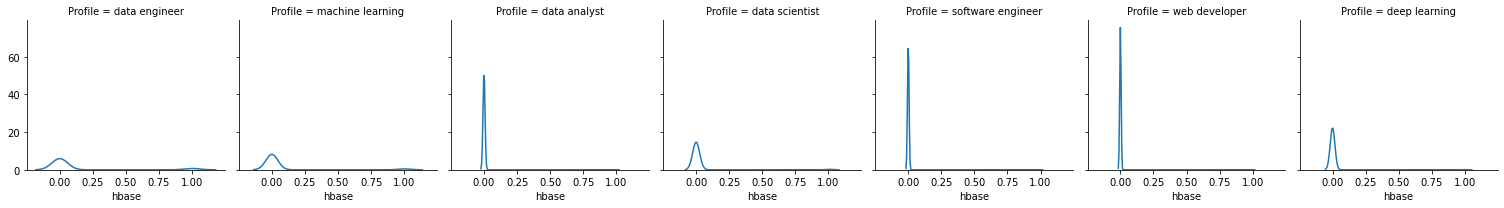

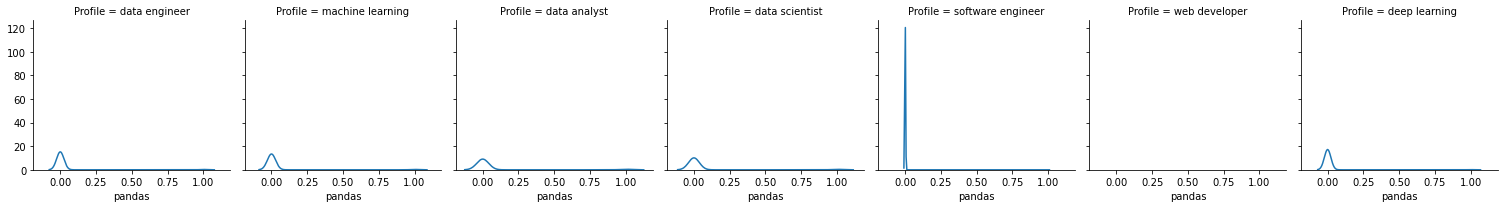

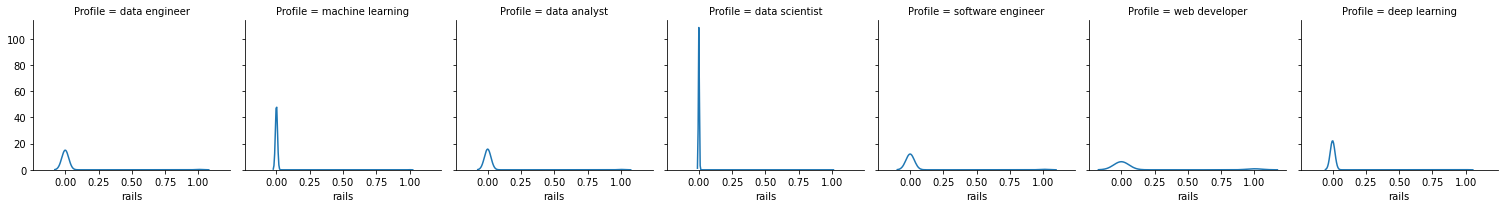

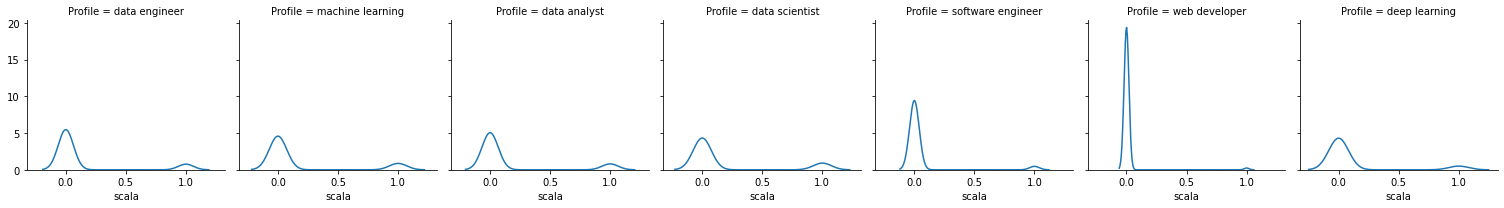

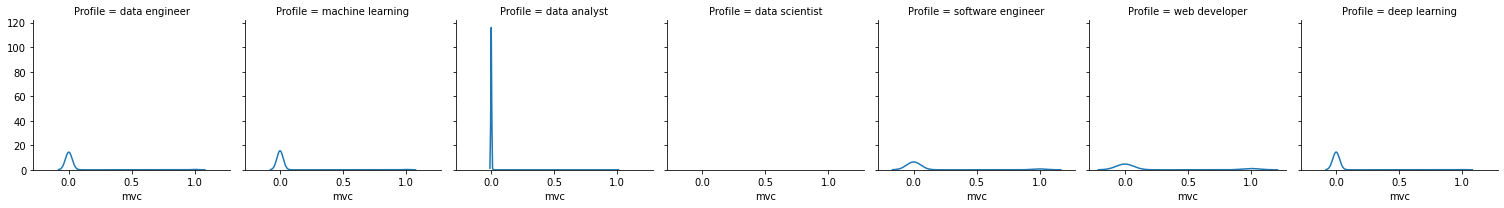

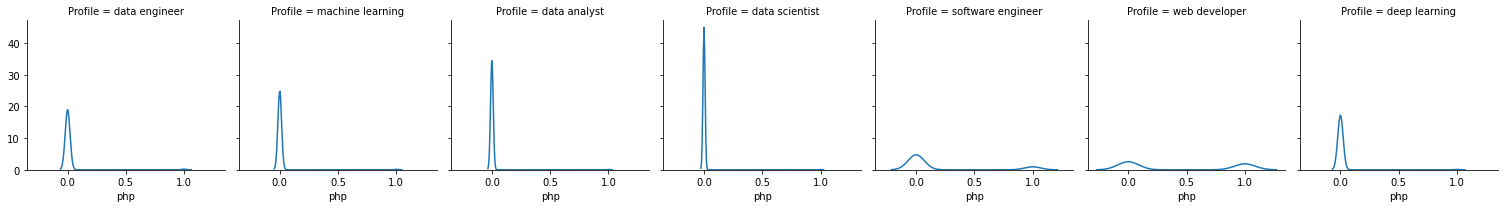

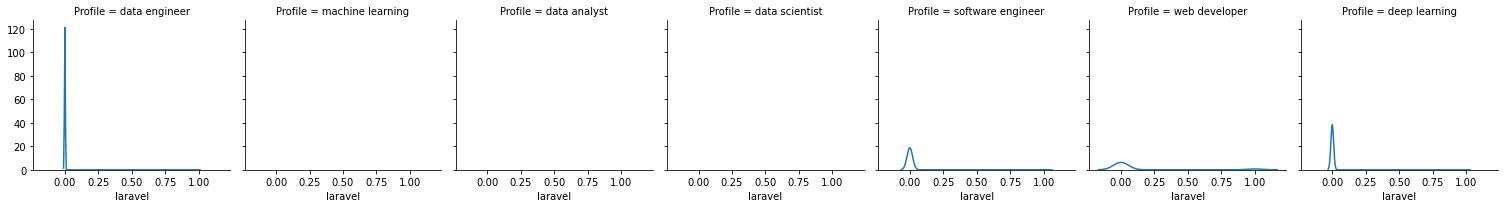

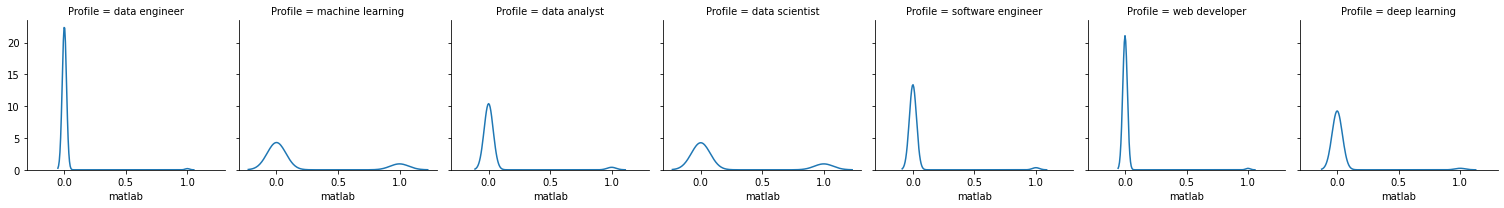

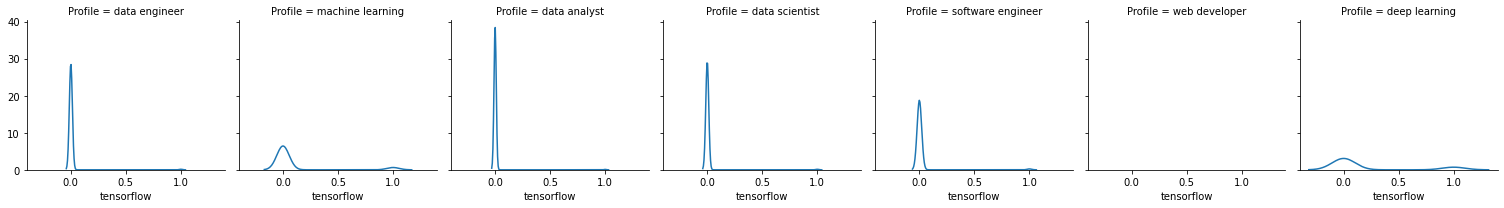

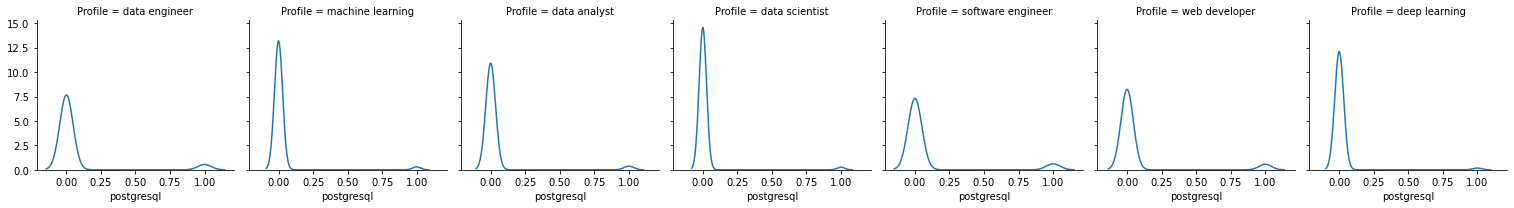

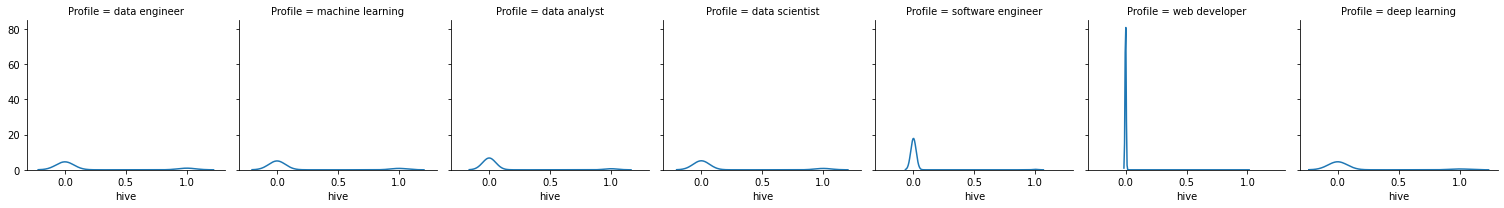

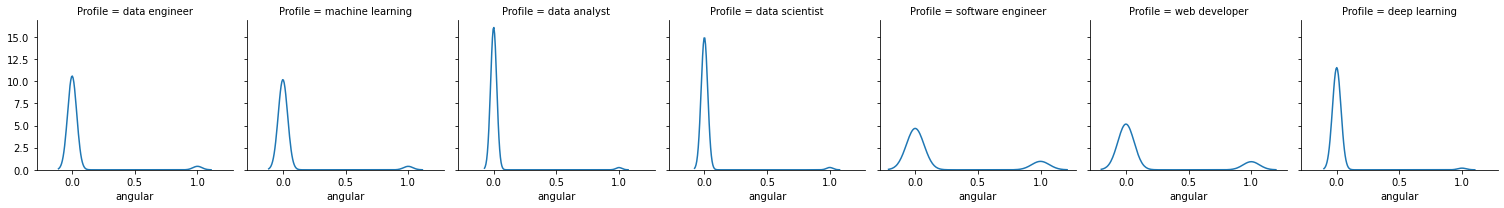

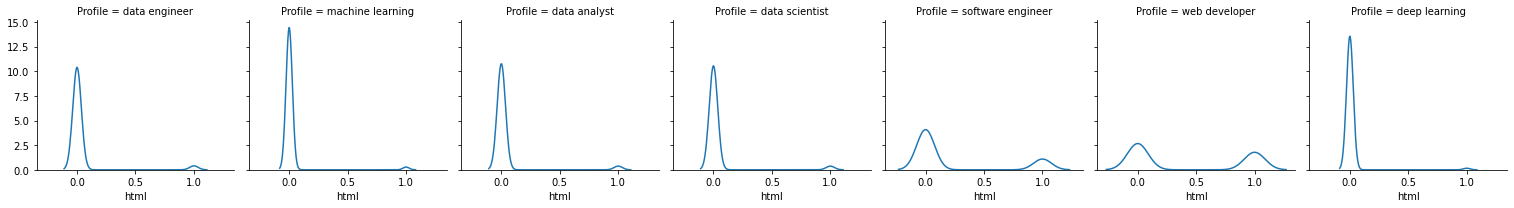

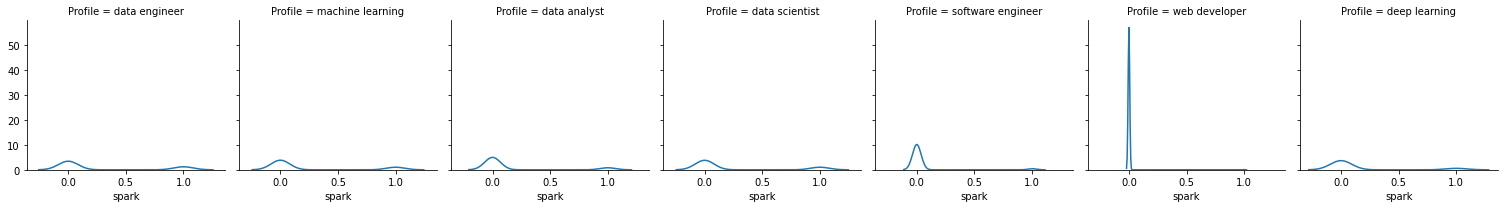

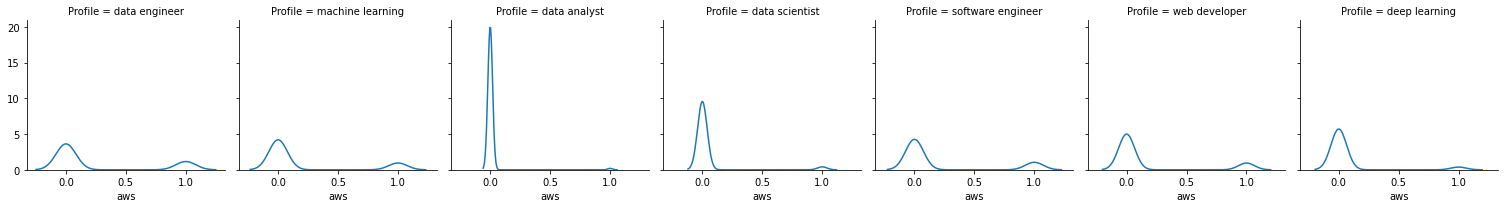

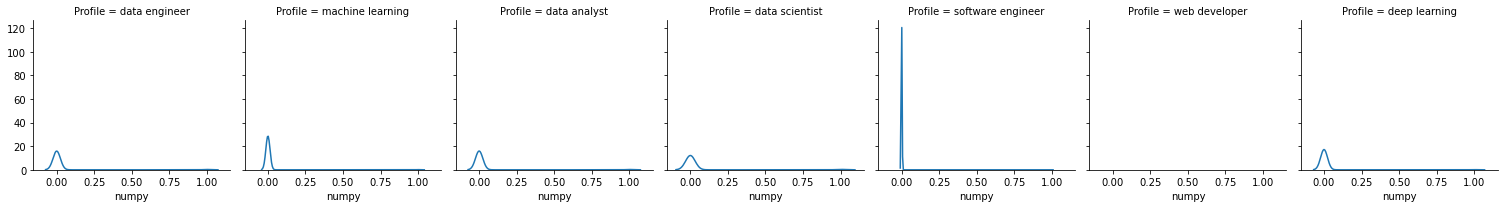

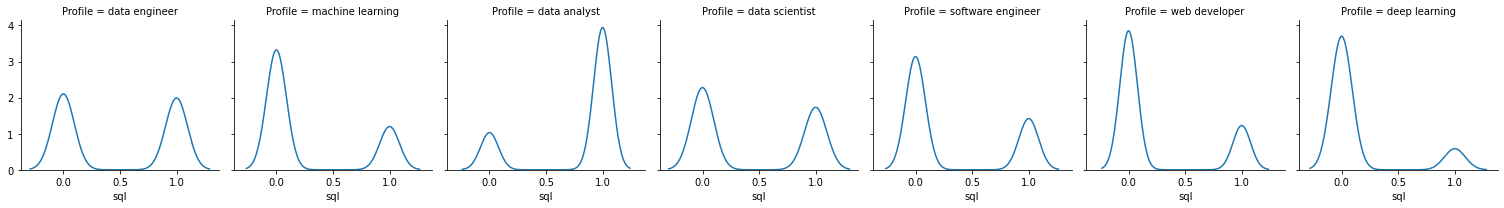

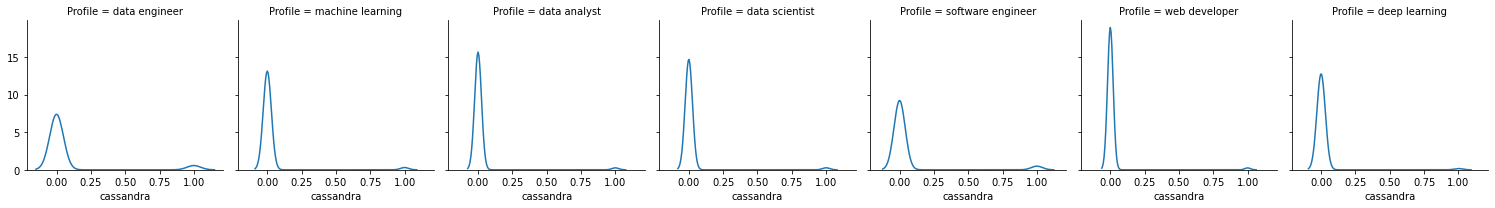

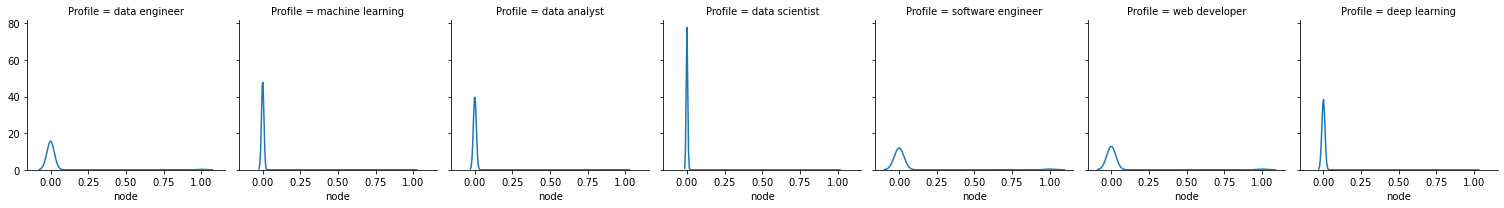

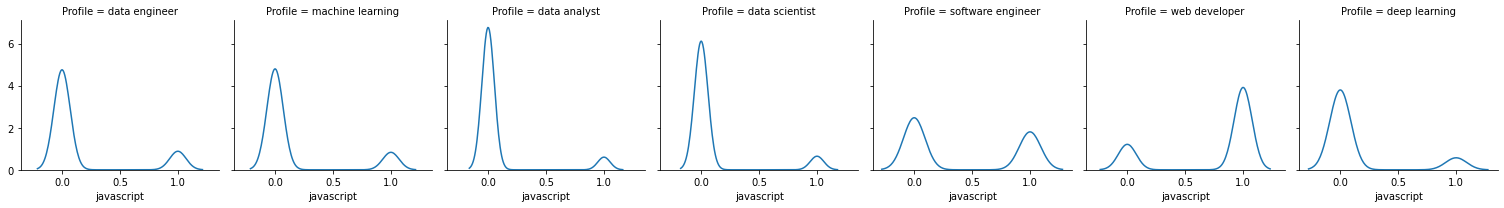

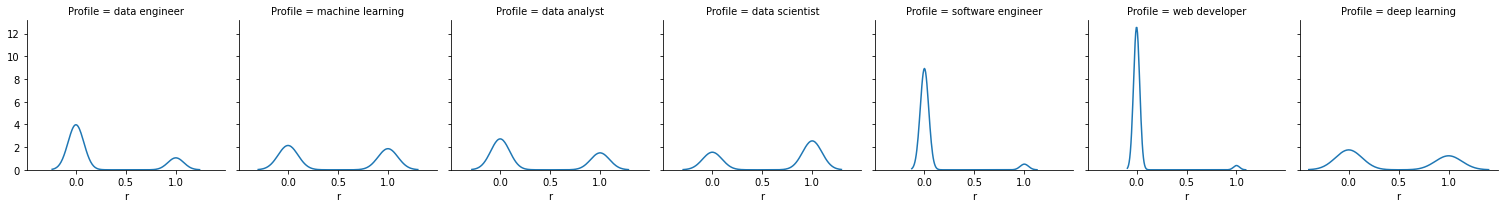

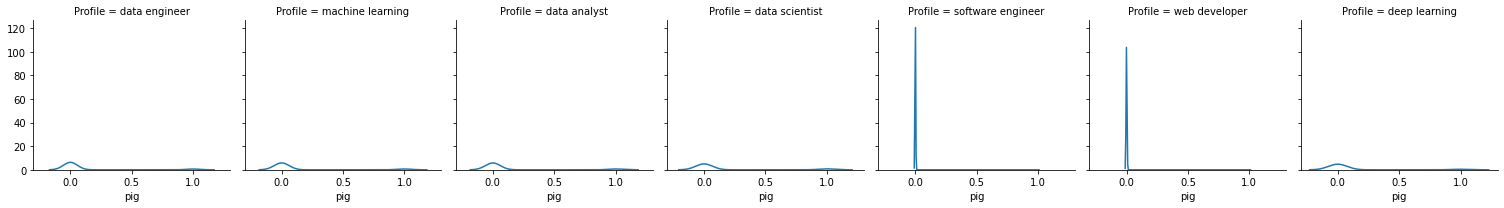

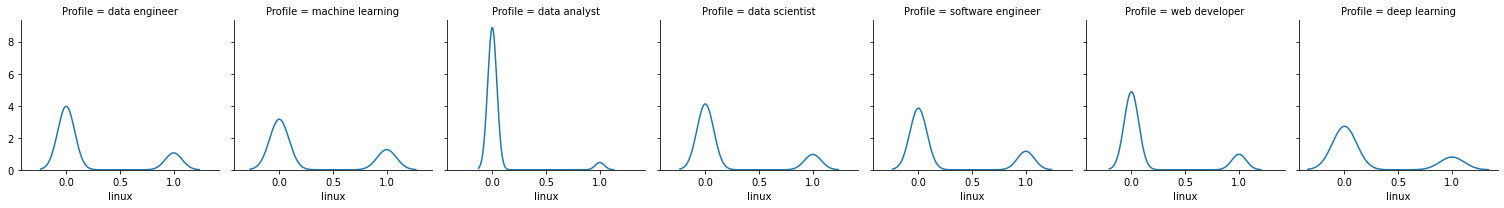

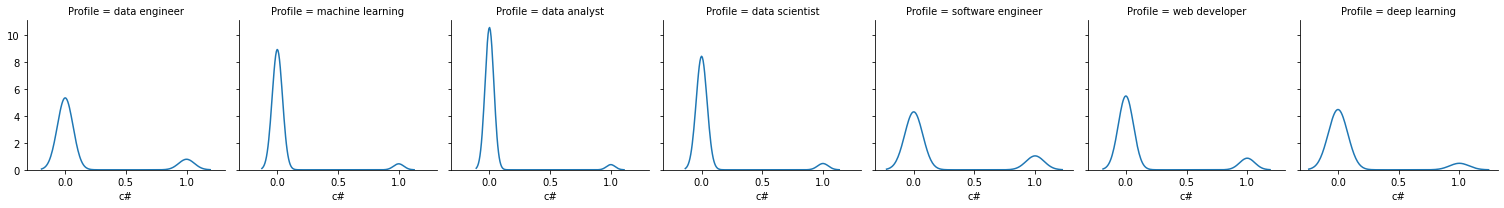

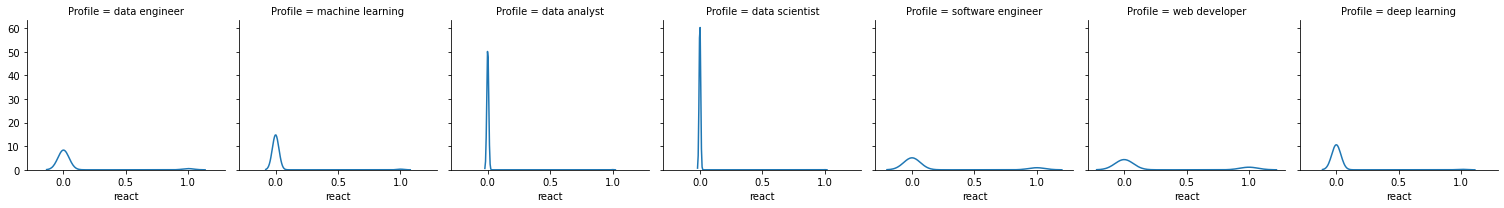

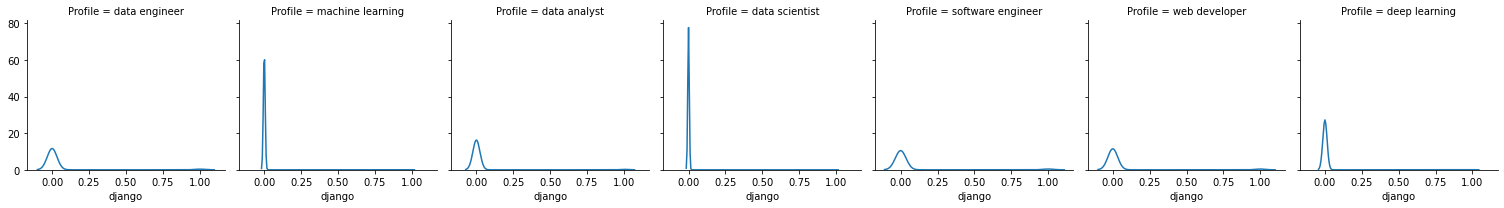

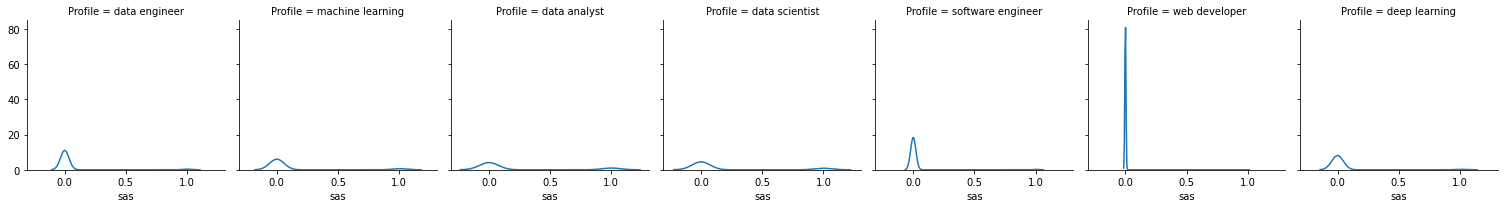

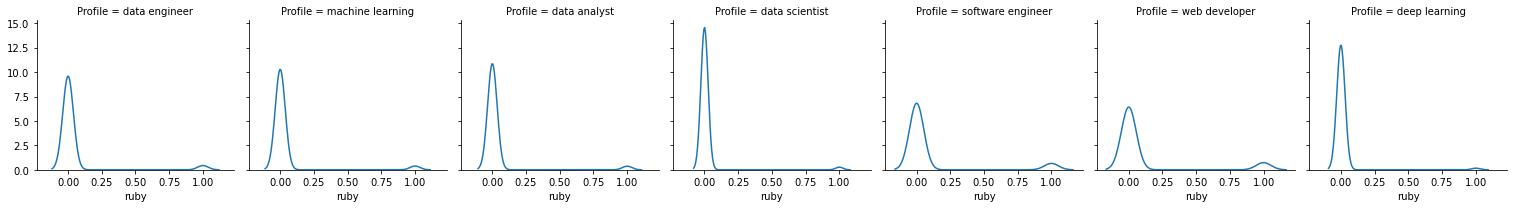

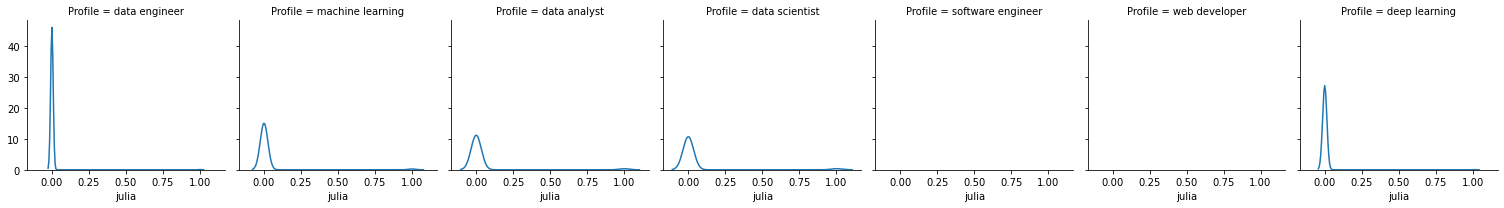

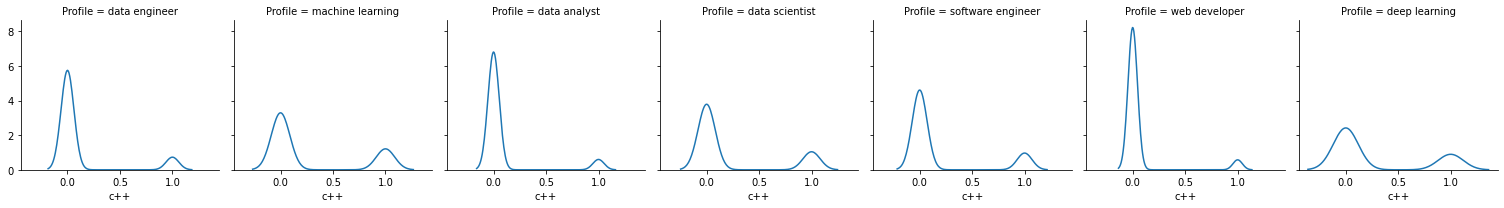

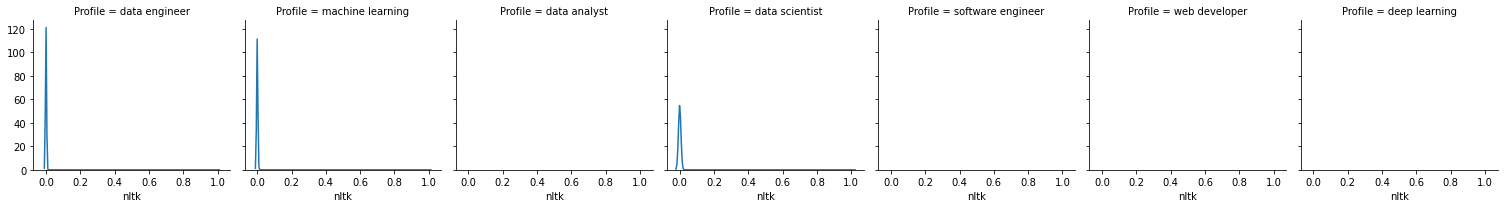

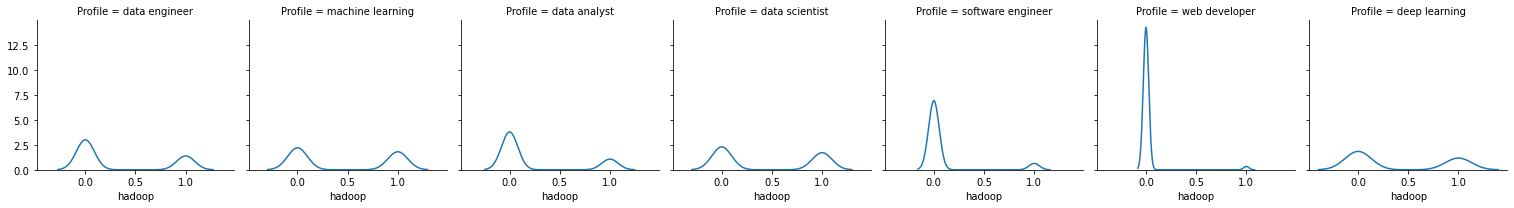

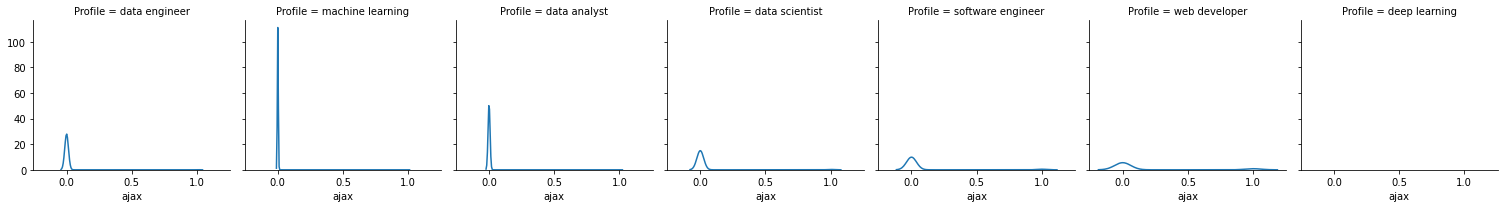

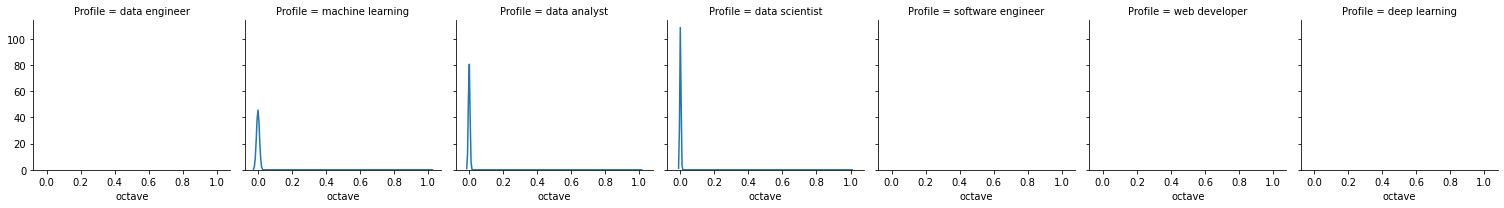

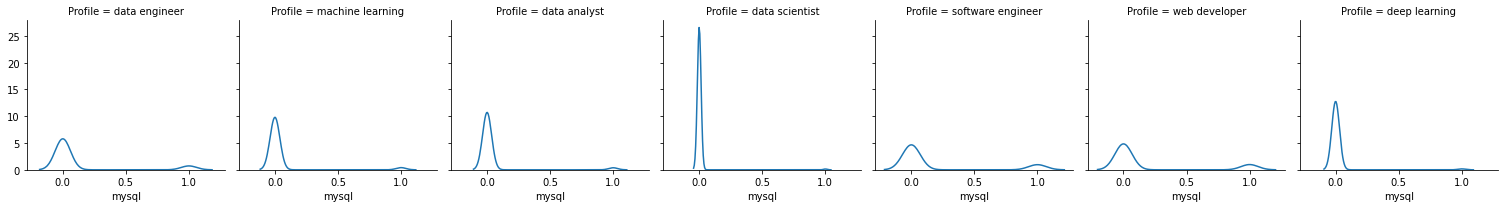

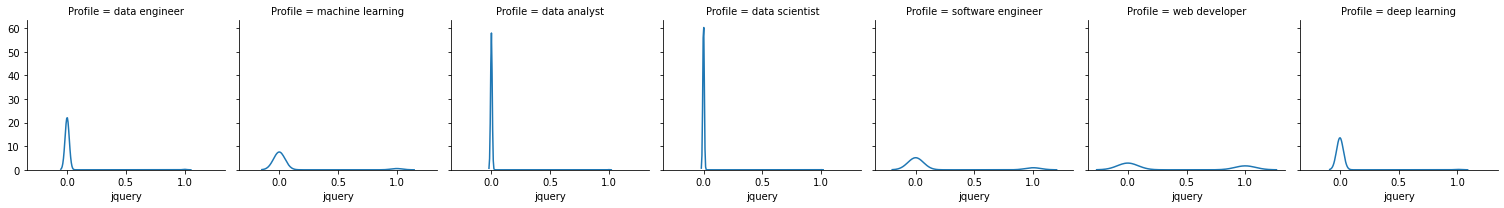

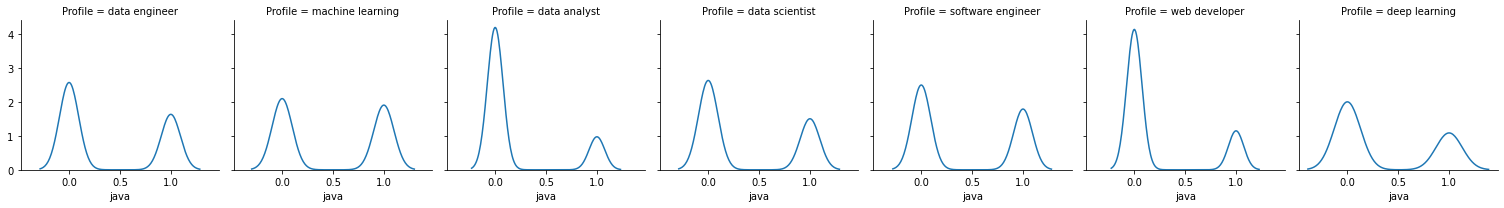

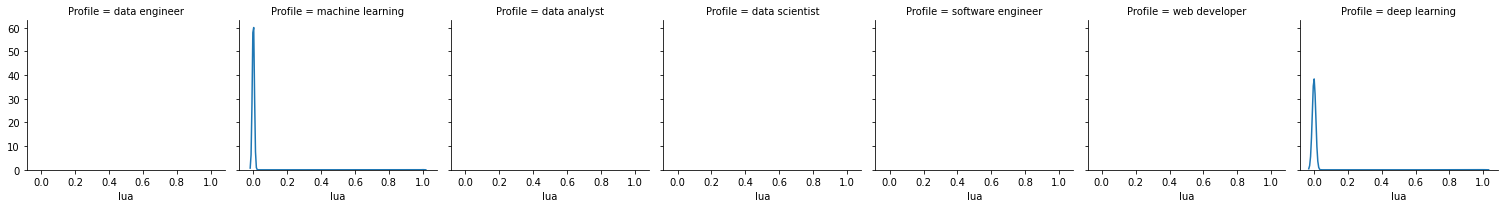

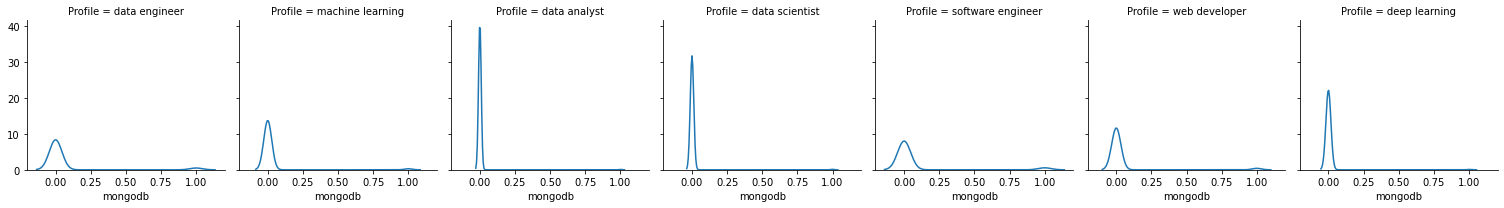

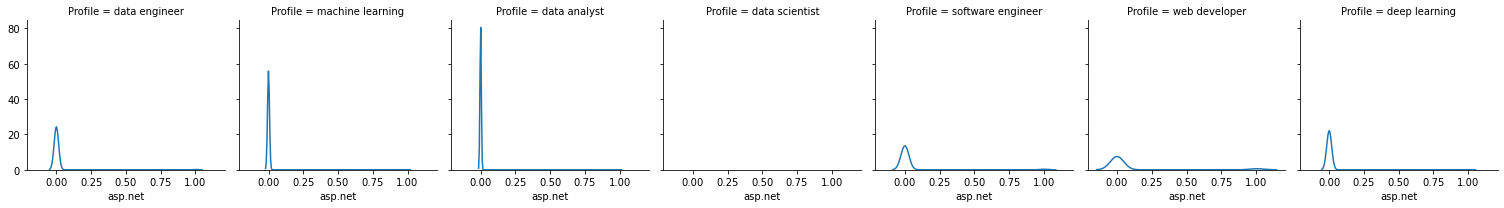

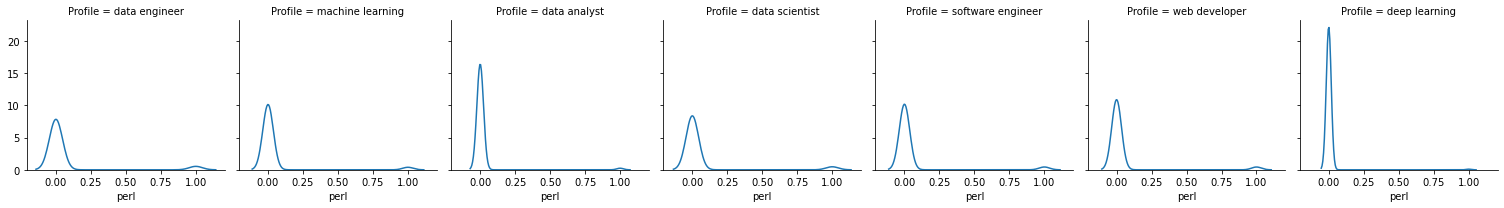

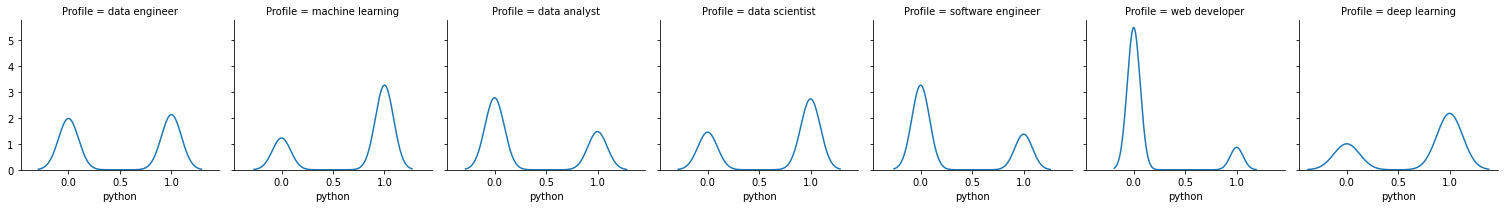

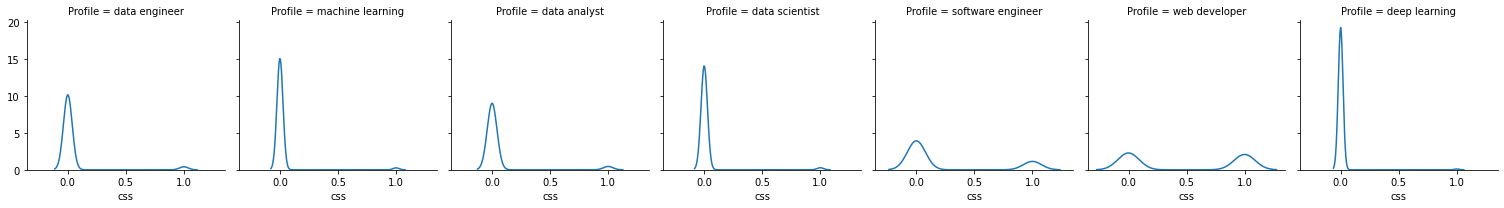

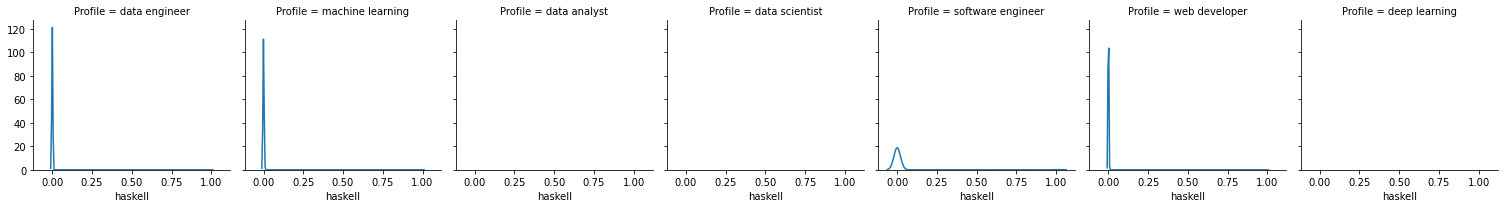

In [16]:
# displaying the significance of each skill in each of the roles
col=list(visualize_data_set.columns)
for i in col[1:]:
    
    a = sns.FacetGrid(visualize_data_set, col='Profile')
    a = a.map(sns.kdeplot, i)

In [18]:
# traning SVM, Guassian Naive bayes, Multinomial Naive Bayes, KNN, Decision Tree, Multi layer Perceptron, and Random Forest. 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import StratifiedShuffleSplit

models = [
    GaussianNB(),
    MultinomialNB(),
#     ComplementNB(),
#     BernoulliNB(),
    svm.SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier(activation="relu", solver="sgd", batch_size=100, learning_rate_init=0.01, learning_rate="invscaling", alpha=1e-5, hidden_layer_sizes=(100, 200), random_state=1, max_iter=1000),
    RandomForestClassifier(n_estimators = 10, random_state = 42)
]

model_names = [
    "Naive Bayes",
    "Naive Bayes (With Smoothing)",
    "SVM",
    "K Nearest Neighbors",
    "Decision Trees",
    "Neural Networks",
    "Random Forest"
]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for model in models:
        print("model : ", model)
        model.fit(X_train, y_train)

TRAIN: 18212 TEST: 4554
model :  GaussianNB()
model :  MultinomialNB()
model :  SVC()
model :  KNeighborsClassifier()
model :  DecisionTreeClassifier()
model :  MLPClassifier(alpha=1e-05, batch_size=100, hidden_layer_sizes=(100, 200),
              learning_rate='invscaling', learning_rate_init=0.01,
              max_iter=1000, random_state=1, solver='sgd')
model :  RandomForestClassifier(n_estimators=10, random_state=42)


                   precision    recall  f1-score   support

software engineer       0.71      0.02      0.03       662
 machine learning       0.81      0.08      0.15       713
    deep learning       0.31      0.77      0.44       614
   data scientist       0.22      0.19      0.21       137
    data engineer       0.83      0.04      0.08       629
    web developer       0.37      0.12      0.18       832
     data analyst       0.37      0.96      0.53       967

         accuracy                           0.36      4554
        macro avg       0.52      0.31      0.23      4554
     weighted avg       0.54      0.36      0.25      4554



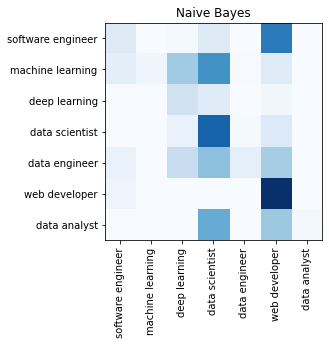

                   precision    recall  f1-score   support

software engineer       0.58      0.64      0.61       662
 machine learning       0.52      0.39      0.45       713
    deep learning       0.37      0.36      0.37       614
   data scientist       0.40      0.06      0.10       137
    data engineer       0.37      0.38      0.37       629
    web developer       0.44      0.41      0.43       832
     data analyst       0.62      0.80      0.70       967

         accuracy                           0.50      4554
        macro avg       0.47      0.43      0.43      4554
     weighted avg       0.49      0.50      0.49      4554



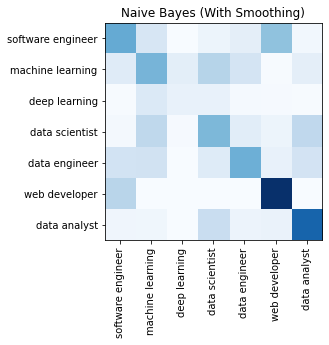

                   precision    recall  f1-score   support

software engineer       0.84      0.64      0.73       662
 machine learning       0.74      0.60      0.66       713
    deep learning       0.47      0.64      0.54       614
   data scientist       0.65      0.08      0.14       137
    data engineer       0.54      0.60      0.57       629
    web developer       0.68      0.70      0.69       832
     data analyst       0.81      0.88      0.84       967

         accuracy                           0.67      4554
        macro avg       0.67      0.59      0.60      4554
     weighted avg       0.69      0.67      0.67      4554



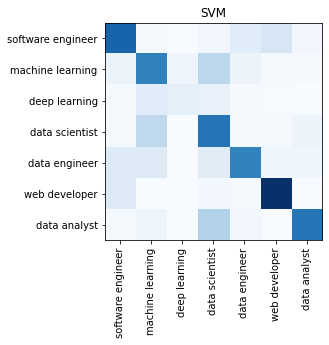

                   precision    recall  f1-score   support

software engineer       0.67      0.76      0.71       662
 machine learning       0.60      0.65      0.62       713
    deep learning       0.55      0.38      0.45       614
   data scientist       0.49      0.20      0.29       137
    data engineer       0.58      0.66      0.62       629
    web developer       0.66      0.78      0.71       832
     data analyst       0.89      0.79      0.83       967

         accuracy                           0.67      4554
        macro avg       0.63      0.60      0.61      4554
     weighted avg       0.67      0.67      0.66      4554



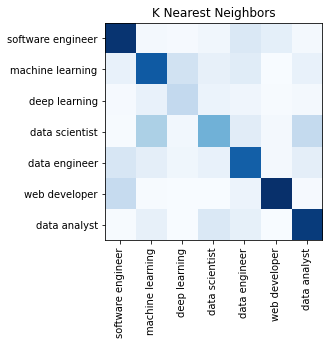

                   precision    recall  f1-score   support

software engineer       0.73      0.70      0.71       662
 machine learning       0.72      0.56      0.63       713
    deep learning       0.45      0.57      0.51       614
   data scientist       0.46      0.26      0.33       137
    data engineer       0.54      0.57      0.55       629
    web developer       0.70      0.73      0.71       832
     data analyst       0.83      0.85      0.84       967

         accuracy                           0.66      4554
        macro avg       0.63      0.60      0.61      4554
     weighted avg       0.67      0.66      0.66      4554



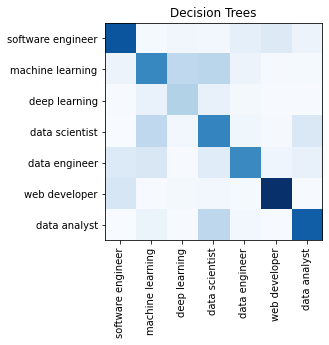

                   precision    recall  f1-score   support

software engineer       0.63      0.68      0.65       662
 machine learning       0.54      0.39      0.46       713
    deep learning       0.39      0.36      0.38       614
   data scientist       0.00      0.00      0.00       137
    data engineer       0.37      0.39      0.38       629
    web developer       0.43      0.48      0.45       832
     data analyst       0.69      0.83      0.75       967

         accuracy                           0.53      4554
        macro avg       0.44      0.45      0.44      4554
     weighted avg       0.50      0.53      0.51      4554



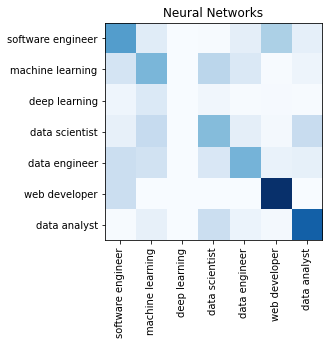

                   precision    recall  f1-score   support

software engineer       0.73      0.72      0.72       662
 machine learning       0.67      0.59      0.63       713
    deep learning       0.47      0.53      0.50       614
   data scientist       0.48      0.21      0.29       137
    data engineer       0.55      0.58      0.56       629
    web developer       0.71      0.71      0.71       832
     data analyst       0.82      0.87      0.84       967

         accuracy                           0.67      4554
        macro avg       0.63      0.60      0.61      4554
     weighted avg       0.67      0.67      0.66      4554



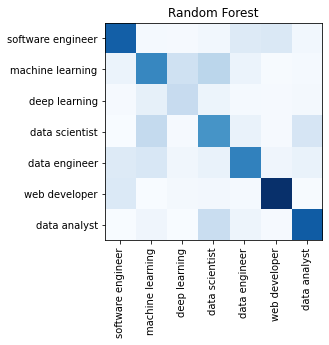

In [21]:
# testing with all classfication models and displaying results

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

labels = list(set(y))
model_accuracy = []
model_train_accuracy = []

for i in range(len(models)):
    y_pred = models[i].predict(X_test)
    conf_m = confusion_matrix(y_test, y_pred, labels=labels)
    conf_m = pd.DataFrame(index=labels, columns=labels, data=np.zeros((len(labels), len(labels))))
    
    accuracy = 0
    
    for j in range(len(y_pred)):
        if y_test[j] == y_pred[j]:
            accuracy += 1
        
        conf_m.loc[y_test[j], y_pred[j]] += 1
    
    for label in labels:
        conf_m[label] /= len(y_test[y_test==label])
    
    accuracy = accuracy * 100 / len(y_pred)
    model_accuracy.append(accuracy_score(y_test, y_pred) * 100)
    
    
    print(classification_report(y_test, y_pred, target_names=labels))
    
    plt.title(model_names[i])
    plt.imshow(conf_m, cmap="Blues")
    plt.xticks([k for k in range(len(labels))], labels, rotation='vertical')
    plt.yticks([k for k in range(len(labels))], labels)
    plt.show()

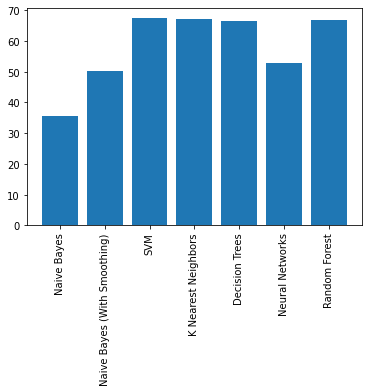

In [42]:
# displaying the accuracies of models as bar graph
plt.bar(model_names, model_accuracy)
# plt.bar(model_names, model_train_accuracy)
plt.xticks([i for i in range(len(models))], model_names, rotation='vertical')
# plt.ylim([12, 68])
plt.show()

In [25]:
# as per results, it is observed that SVM and random forest seem appropriate models to train the given data
# below we are computing the accuracy on overall set and within each role with SVM as the classifier
# even the though the overall accuracy is low, the accuracy within each class is significantly high, this may be because
# the skills are repeating across all the roles.

classifier = svm.SVC()

In [26]:
# dividing the data set overall to train and test 
mask = np.random.rand(len(visualize_data_set)) < 0.8
overall_set=visualize_data_set.copy()
train_overall = overall_set[mask]
test_overall_X = overall_set[~mask]
train_overall_y = train_overall['Profile']
del train_overall['Profile']  
train_overall_X = train_overall.to_numpy()
test_overall_y = test_overall_X['Profile']
del test_overall_X['Profile']

In [27]:
# train, test and displaying accuracy
classifier = classifier.fit(train_overall_X, train_overall_y)  # Feeding training data to the classifier
predictions = classifier.predict(test_overall_X.to_numpy())

print("Overall set")
print(accuracy_score(test_overall_y, predictions)*100,"%")

Overall set
67.49280814339456 %


In [28]:
# displaying th profile roles
i=0
profiles=list(set(list(visualize_data_set['Profile'])))
print(profiles)
print(len(profiles))

['software engineer', 'machine learning', 'deep learning', 'data scientist', 'data engineer', 'web developer', 'data analyst']
7


In [32]:
# function to train, test and display accuracy within each role
def accuracy_for_each_role(dataset, target_query):
    dataset[target_query] = dataset['Profile'].apply(lambda x: int(target_query == x))
    del dataset['Profile']
    train_set = dataset[mask]
    test_set_X = dataset[~mask]
    train_set_y = train_set[target_query]
    del train_set[target_query] 
    train_set_X = train_set.to_numpy()
    test_set_y = test_set_X[target_query]
    del test_set_X[target_query] 

    classifier = svm.SVC()
    classifier = classifier.fit(train_set_X, train_set_y)  # Feeding training data to the classifier
    predictions = classifier.predict(test_set_X.to_numpy())

    print(target_query)
    print(accuracy_score(test_set_y, predictions)*100,"%")  

In [33]:
# loop to go through each of the profile role, and call the above function to display the accuracy
for i in range(len(profiles)):
    role_set=visualize_data_set.copy()
    target_query=profiles[i]
    accuracy_for_each_role(role_set,target_query) 

software engineer
89.68798406727151 %
machine learning
90.13055985837575 %
deep learning
97.12325735782252 %
data scientist
88.60367337906617 %
data engineer
90.94932507191857 %
web developer
93.9588404514273 %
data analyst
93.09581765877407 %


In [34]:
# doing the same for random forest classifier and checking the accuracy for overall, and then within each of the roles.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 10, random_state = 42)
rf=rf.fit(train_overall_X,train_overall_y)
predictions = rf.predict(test_overall_X.to_numpy())

print("Overall set")
print(accuracy_score(test_overall_y, predictions)*100,"%")

Overall set
67.16087630006639 %


In [35]:
# the same accuracy function as above with just the SVM changed to random forest classifier
def accuracy_for_each_role_rf(dataset, target_query):
    dataset[target_query] = dataset['Profile'].apply(lambda x: int(target_query == x))
    del dataset['Profile']
    train_set = dataset[mask]
    test_set_X = dataset[~mask]
    train_set_y = train_set[target_query]
    del train_set[target_query] 
    train_set_X = train_set.to_numpy()
    test_set_y = test_set_X[target_query]
    del test_set_X[target_query] 

    rf=RandomForestClassifier(n_estimators = 10, random_state = 42)
    rf=rf.fit(train_set_X, train_set_y)
    predictions=rf.predict(test_set_X.to_numpy())

    print(target_query)
    print(accuracy_score(test_set_y, predictions)*100,"%")  

In [36]:
for i in range(len(profiles)):
    role_set=visualize_data_set.copy()
    target_query=profiles[i]
    accuracy_for_each_role_rf(role_set,target_query) 

software engineer
89.59946890905067 %
machine learning
90.2412038061518 %
deep learning
96.96835583093605 %
data scientist
88.42664306262448 %
data engineer
90.66165080770082 %
web developer
94.135870767869 %
data analyst
92.985173710998 %


In [37]:
def read_pdf(path):
    pdf_obj = open(path, 'rb')
    pdf_reader = PyPDF2.PdfFileReader(pdf_obj)
    return ''.join((pdf_reader.getPage(i).extractText() for i in range(pdf_reader.numPages)))

In [38]:
def extract_key_words(list_of_words, text):
    presence = []
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for word in list_of_words:
        if word == 'r':
            presence.append(int('r' in tokens))	#Had to do it seperatly for 'r' as 'r' letter in text does not neccesarily imply R language in the text
        else:
            presence.append(word in text)
    return presence

In [40]:
# here the classifier is Support vector machines
for file_name in sorted(os.listdir('./Resumes')):
    #if file_name.endswith('pdf'):
    print(file_name,"\n", classifier.predict([extract_key_words(unique_skills_set, read_pdf('./Resumes/{}'.format(file_name)))])[0])
    print("\n")

sample_resume1.pdf 
 software engineer


sample_resume10.pdf 
 data engineer


sample_resume11.pdf 
 software engineer


sample_resume12.pdf 
 software engineer


sample_resume13.pdf 
 data engineer


sample_resume14.pdf 
 software engineer


sample_resume15.pdf 
 data scientist


sample_resume16.pdf 
 software engineer


sample_resume17.pdf 
 software engineer


sample_resume18.pdf 
 data engineer


sample_resume19.pdf 
 web developer


sample_resume2.pdf 
 machine learning


sample_resume20.pdf 
 machine learning


sample_resume21.pdf 
 web developer


sample_resume22.pdf 
 data engineer


sample_resume23.pdf 
 data engineer


sample_resume24.pdf 
 web developer


sample_resume25.pdf 
 software engineer


sample_resume3.pdf 
 web developer


sample_resume4.pdf 
 web developer


sample_resume5.pdf 
 web developer


sample_resume6.pdf 
 software engineer


sample_resume7.pdf 
 web developer


sample_resume8.pdf 
 machine learning


sample_resume9.pdf 
 web developer




In [41]:
#using random forest to predict job roles for resume

for file_name in sorted(os.listdir('./Resumes')):
    #if file_name.endswith('pdf'):
    print(file_name,"\n", rf.predict([extract_key_words(unique_skills_set, read_pdf('./Resumes/{}'.format(file_name)))])[0])
    print("\n")

sample_resume1.pdf 
 software engineer


sample_resume10.pdf 
 data engineer


sample_resume11.pdf 
 software engineer


sample_resume12.pdf 
 software engineer


sample_resume13.pdf 
 machine learning


sample_resume14.pdf 
 data engineer


sample_resume15.pdf 
 data scientist


sample_resume16.pdf 
 software engineer


sample_resume17.pdf 
 software engineer


sample_resume18.pdf 
 data engineer


sample_resume19.pdf 
 web developer


sample_resume2.pdf 
 data analyst


sample_resume20.pdf 
 data scientist


sample_resume21.pdf 
 software engineer


sample_resume22.pdf 
 data engineer


sample_resume23.pdf 
 data analyst


sample_resume24.pdf 
 web developer


sample_resume25.pdf 
 software engineer


sample_resume3.pdf 
 web developer


sample_resume4.pdf 
 web developer


sample_resume5.pdf 
 software engineer


sample_resume6.pdf 
 web developer


sample_resume7.pdf 
 web developer


sample_resume8.pdf 
 data scientist


sample_resume9.pdf 
 software engineer


